In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#paramtres
#classifieurs
nb_classifieurs=50
nb_pds=6

#echantillons
nb_echantillons=100
nb_nuages=2
nb_points=100
nb_dimensions=5

#Population

nb_points_bis=1000000

In [3]:
#Creation des classifieurs
#pour avoir de meilleur résultats, il faut quand k =6 avoir un b qui varie plus... par exemple de -15 à 15

classifieurs=np.arange(float(nb_classifieurs)*nb_pds).reshape(nb_classifieurs,nb_pds)
#colonnes 1->5 poids (Wi) 6 b
for n in range(nb_classifieurs):
    for k in range(nb_pds):
        val=(random.random()*20)-10
        classifieurs[n,k]=val
#print(classifieurs)

In [4]:
#Générer 100 jeux de données
echantillons=np.arange(float(nb_echantillons)*nb_nuages*100*5).reshape(nb_echantillons,nb_nuages,nb_points,nb_dimensions)
#permier crochet représente le choix de l'échantillons (100)
#deuxieme crochet le choix du nuage (2)
#troisieme crochet le choix du point(100)
#quatirème crochet les 5 dimensions
mu1=(10,0,0,0,0)
mu2=(0,10,0,0,0)
covar=3*np.eye(5,5)
for n in range(nb_echantillons):
    for k in range(nb_nuages):
        for j in range(nb_points):
            if (k==0):
                echantillons[n,k,j]=np.random.multivariate_normal(mu1,covar)
            if (k==1):
                echantillons[n,k,j]=np.random.multivariate_normal(mu2,covar)

In [5]:
#tester les catégories
Errors=np.arange(float(nb_classifieurs)*nb_echantillons)
tempo=np.arange(float(nb_nuages)*nb_points)
for n in range(nb_echantillons):
#for n in range(1):
    for i in range (nb_classifieurs):
        for k in range(nb_nuages):
            for j in range(nb_points):
                value=0
                for l in range(nb_dimensions):
                    value=value+(classifieurs[i,l]*echantillons[n,k,j,l])
                value=value+classifieurs[i,nb_dimensions]
                if(value>=0):
                    if(k==0):
                        tempo[k*nb_points+j]=1
                    if(k==1):
                        tempo[k*nb_points+j]=0
                else:
                    if(k==1):
                        tempo[k*nb_points+j]=1
                    if(k==0):
                        tempo[k*nb_points+j]=0
        #calculer Ein         
        Ein=0
        for m in tempo:
            Ein=Ein+m
        Ein=float(Ein)/(nb_nuages*nb_points)
        Errors[nb_classifieurs*n+i]=Ein
print(Errors)

[0.915 0.045 0.1   ... 1.    0.61  0.5  ]


In [6]:
#Générer 100 jeux de données
megaset=np.arange(nb_nuages*nb_points_bis*nb_dimensions).reshape(nb_nuages,nb_points_bis,nb_dimensions)
#permier crochet représente le choix de l'échantillons (100)
#deuxieme crochet le choix du nuage (2)
#troisieme crochet le choix du point(100)
#quatirème crochet les 5 dimensions
mu1=(10,0,0,0,0)
mu2=(0,10,0,0,0)
covar=3*np.eye(5,5)

for k in range(nb_nuages):
    for j in range(nb_points_bis):
        if (k==0):
            megaset[k,j]=np.random.multivariate_normal(mu1,covar)
        if (k==1):
            megaset[k,j]=np.random.multivariate_normal(mu2,covar)

In [7]:
#tester les catégories
Errors_out=np.arange(float(nb_classifieurs))
tempo=np.arange(float(nb_nuages)*nb_points_bis)


for i in range (nb_classifieurs):
    for k in range(nb_nuages):
        for j in range(nb_points_bis):
            value=0
            for l in range(nb_dimensions):
                value=value+(classifieurs[i,l]*megaset[k,j,l])
            value=value+classifieurs[i,nb_dimensions]
            if(value>=0):
                if(k==0):
                    tempo[k*nb_points_bis+j]=1
                if(k==1):
                    tempo[k*nb_points_bis+j]=0
            else:
                if(k==1):
                    tempo[k*nb_points_bis+j]=1
                if(k==0):
                    tempo[k*nb_points_bis+j]=0
    #calculer Ein         
    Ein=0
    for m in tempo:
        Ein=Ein+m
    Ein=float(Ein)/(nb_nuages*nb_points_bis)
    Errors_out[i]=Ein
print(Errors_out)

[9.574400e-01 1.308450e-02 8.507950e-02 8.242950e-02 8.794255e-01
 9.915000e-04 4.987990e-01 6.263950e-01 9.788475e-01 7.363800e-02
 4.860110e-01 4.525200e-01 4.810505e-01 1.554690e-01 4.988920e-01
 4.929385e-01 2.093200e-02 5.537385e-01 3.317930e-01 9.994560e-01
 3.674950e-02 4.999885e-01 7.083460e-01 5.001645e-01 4.577470e-01
 5.244205e-01 8.623560e-01 5.006090e-01 6.397500e-03 7.452575e-01
 9.821650e-02 3.637995e-01 9.960285e-01 8.501280e-01 4.419830e-01
 9.917130e-01 4.967055e-01 5.968145e-01 9.983830e-01 6.119000e-03
 4.998820e-01 9.949130e-01 7.968230e-01 4.151490e-01 9.712560e-01
 6.951850e-01 4.478800e-02 9.954830e-01 6.039270e-01 5.000585e-01]


In [8]:
Error_diff=np.zeros(nb_classifieurs*nb_echantillons)
Errors_bis=np.zeros(nb_classifieurs*nb_echantillons)
for n in range(nb_echantillons):
    for i in range (nb_classifieurs):
        Error_diff[nb_echantillons*i+n]=Errors_out[i]-Errors[nb_classifieurs*n+i]
        Errors_bis[nb_echantillons*i+n]=Errors_out[i]-Error_diff[nb_echantillons*i+n]
print(Error_diff)

[4.244e-02 5.744e-02 1.244e-02 ... 5.850e-05 5.850e-05 5.850e-05]


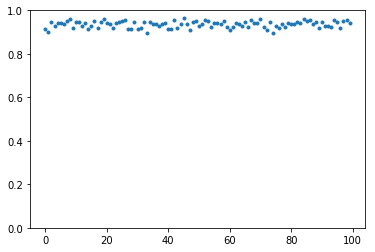

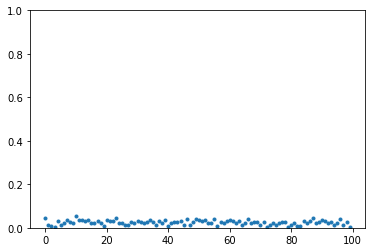

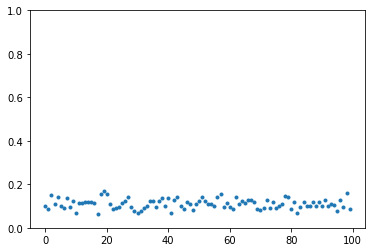

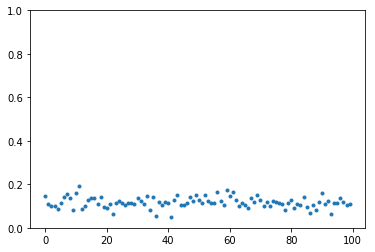

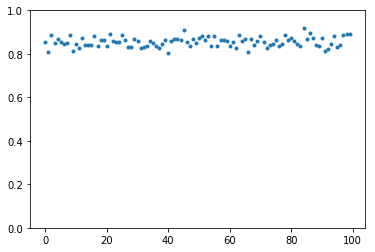

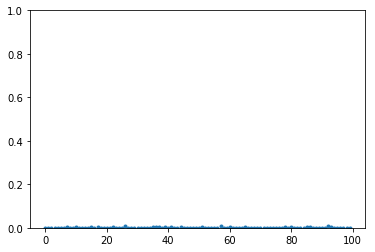

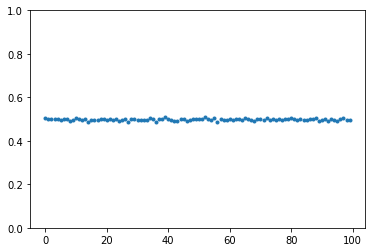

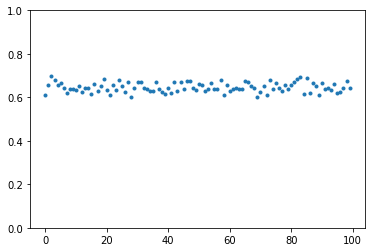

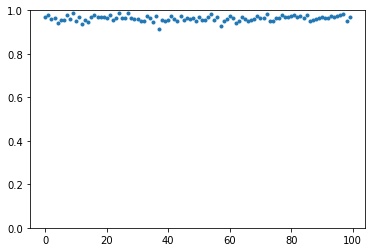

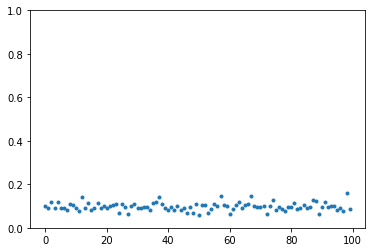

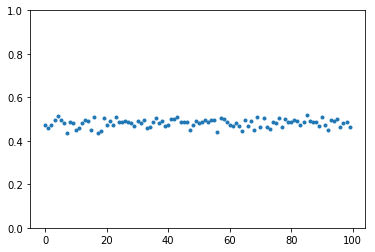

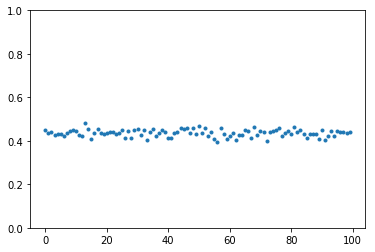

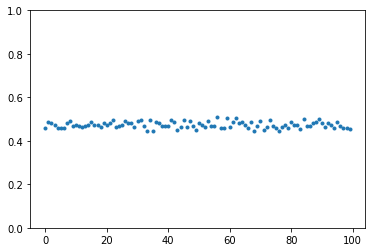

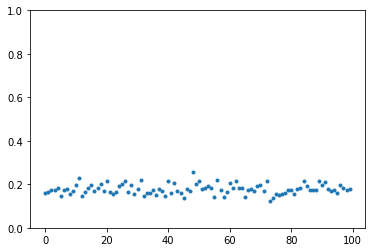

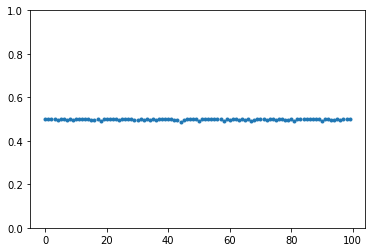

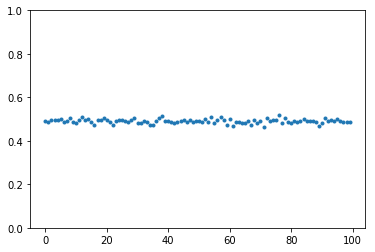

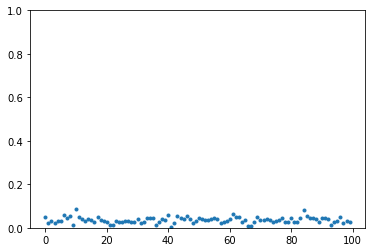

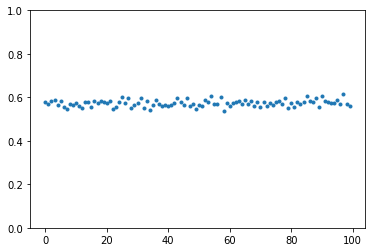

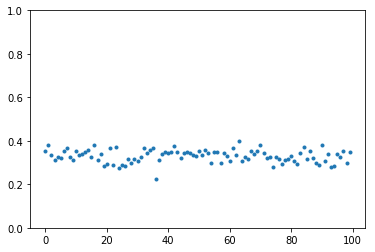

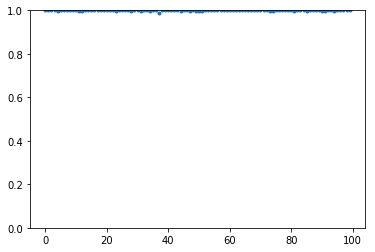

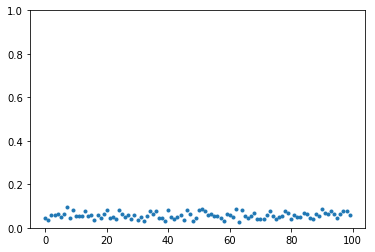

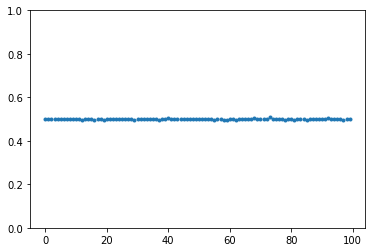

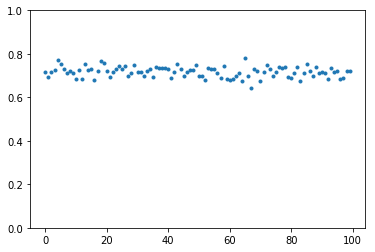

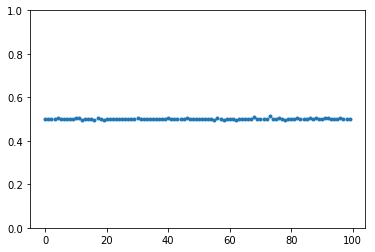

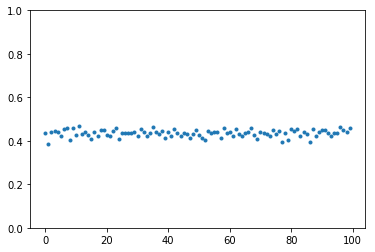

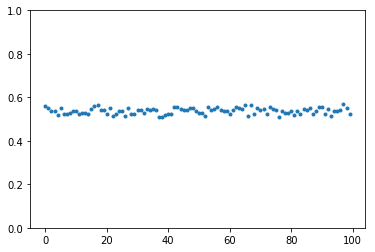

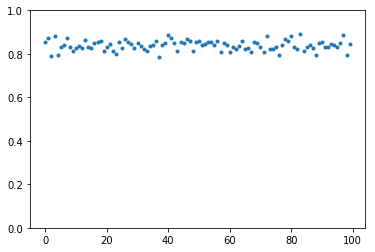

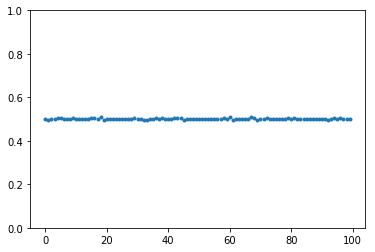

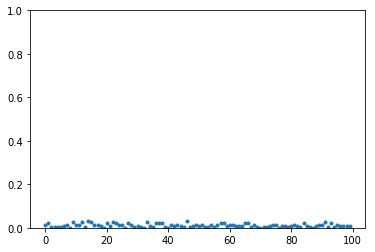

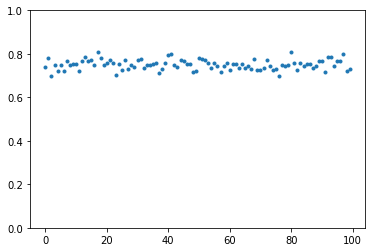

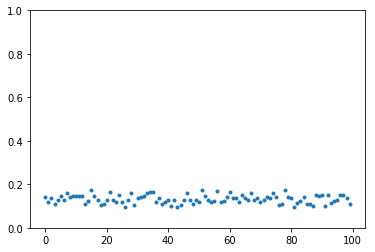

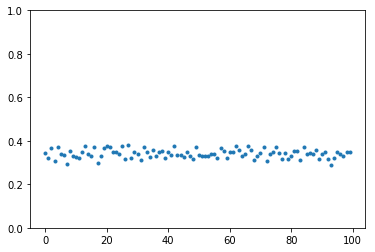

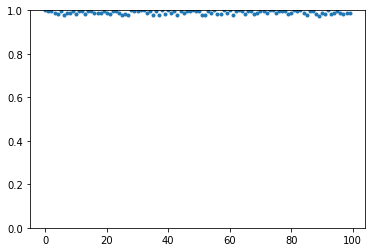

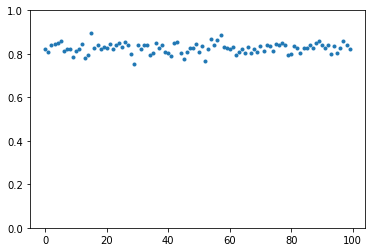

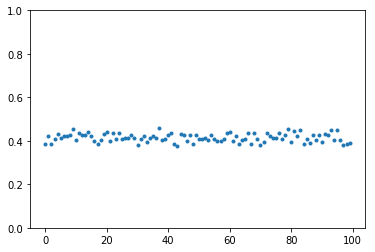

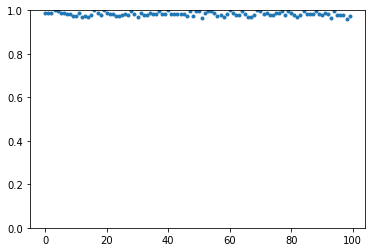

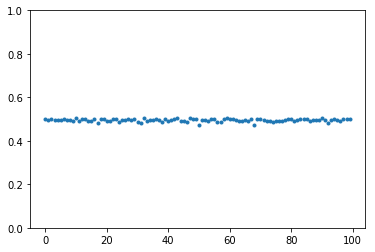

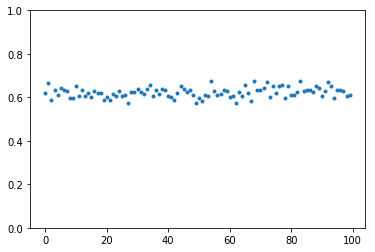

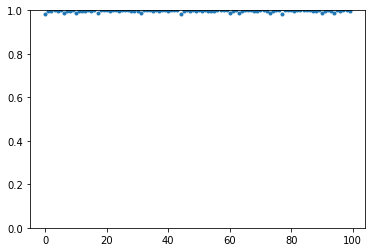

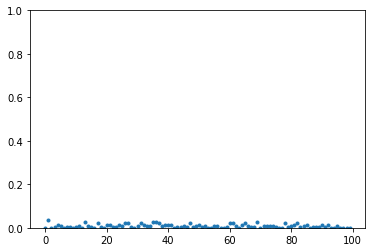

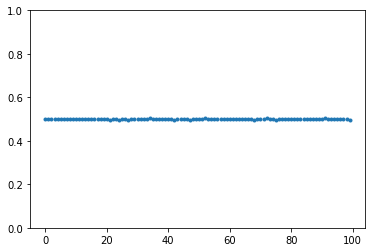

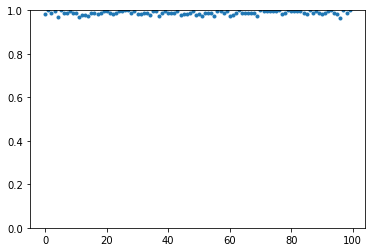

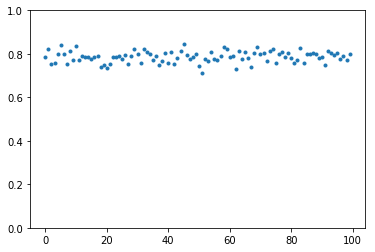

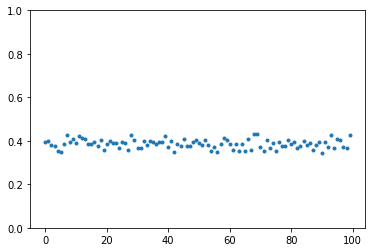

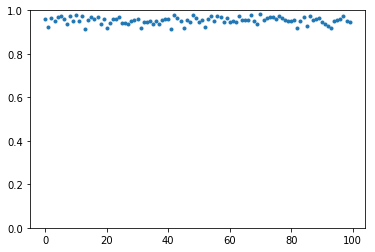

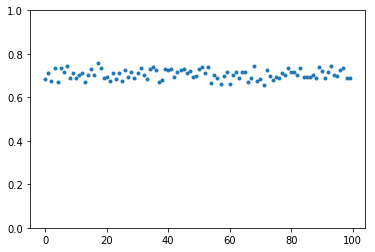

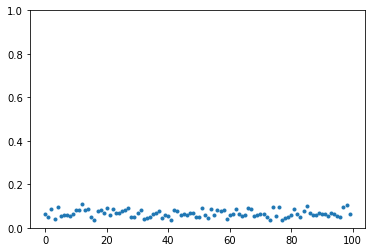

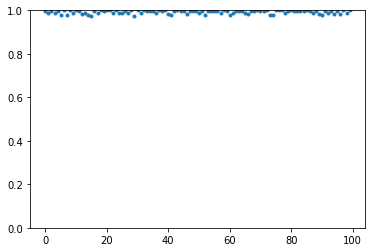

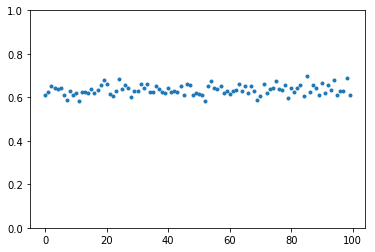

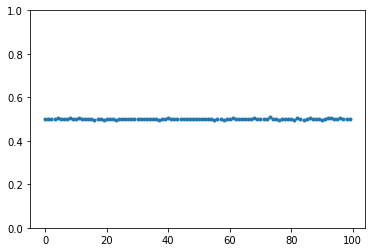

In [9]:

x=2
y=25
#f, axarr = plt.subplots(y, x)
for i in range (y):
    for j in range(x):
        plt.scatter(np.arange(nb_echantillons), Errors_bis[(j*100+i*200):(j*100+i*200+100)],marker='.')
        plt.ylim(0.0,1.0)
        plt.show()

#plt.scatter(np.arange(nb_classifieurs*nb_echantillons),Errors,marker='.')



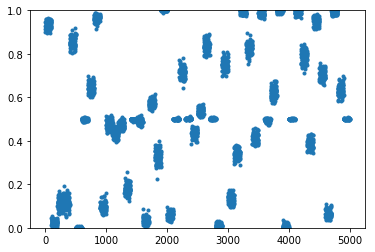

In [13]:
plt.scatter(np.arange(nb_echantillons*nb_classifieurs), Errors_bis,marker='.')
plt.ylim(0.0,1.0)
plt.show()

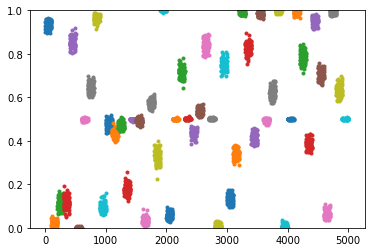

In [28]:
for j in range(nb_classifieurs):
    plt.scatter(nb_echantillons*j+np.arange(nb_echantillons), Errors_bis[(j*100):(j*100+100)],marker='.')
    plt.ylim(0.0,1.0)
plt.show()

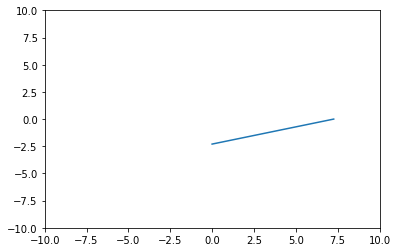

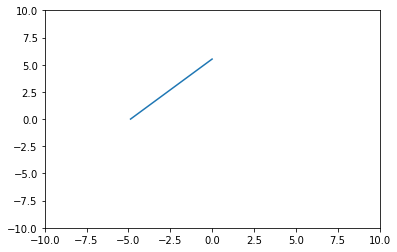

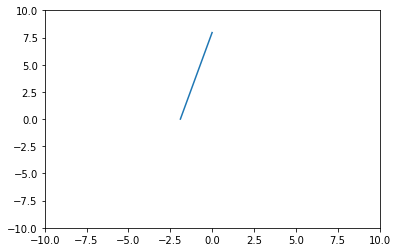

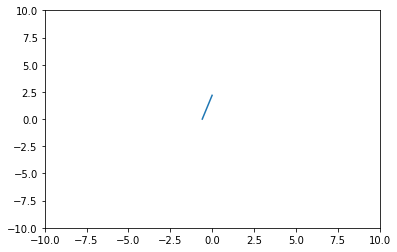

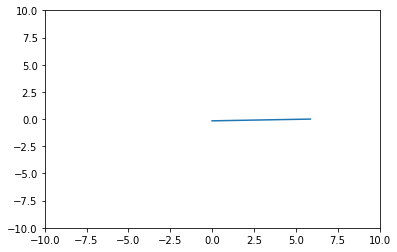

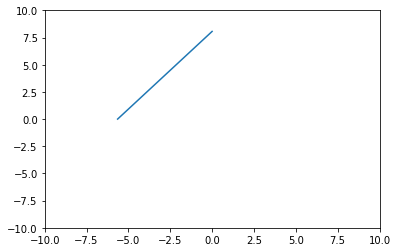

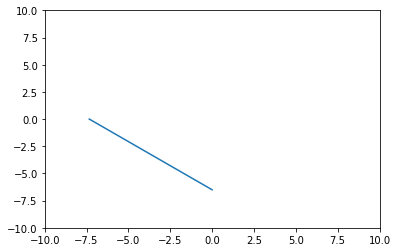

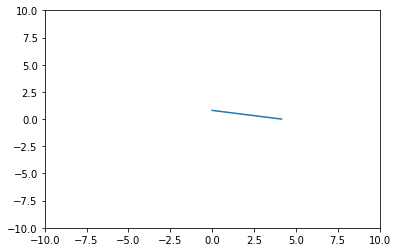

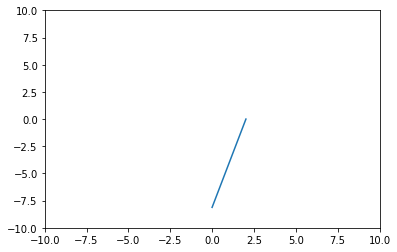

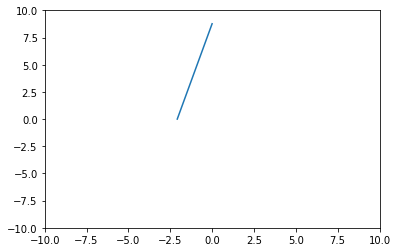

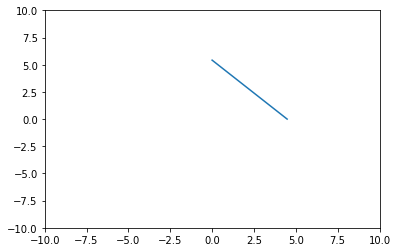

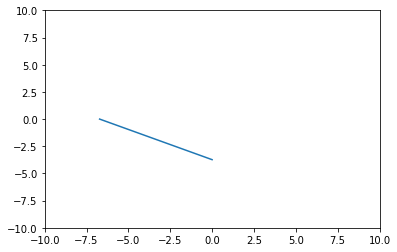

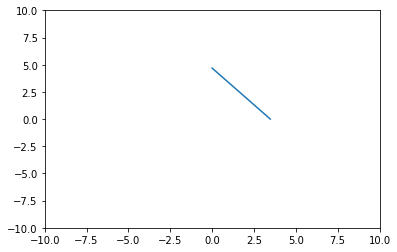

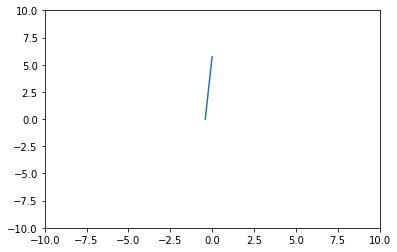

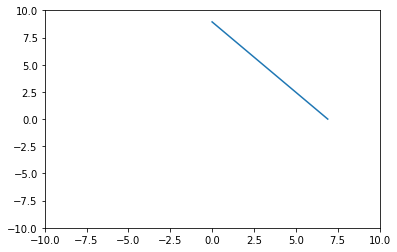

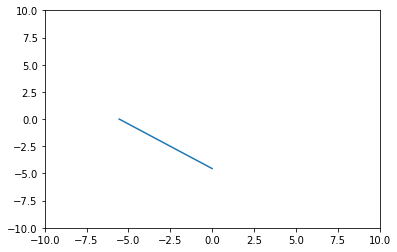

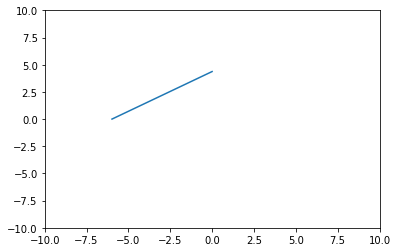

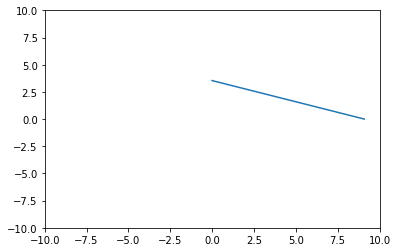

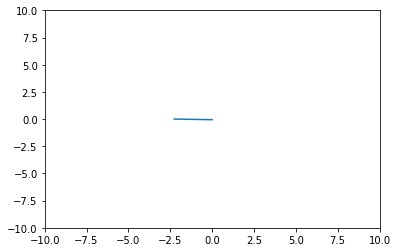

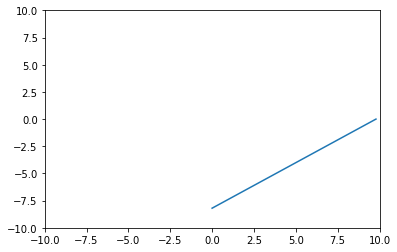

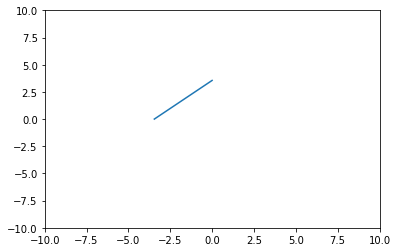

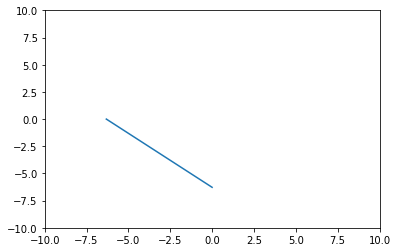

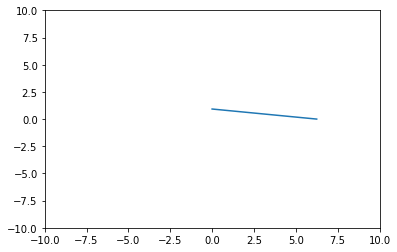

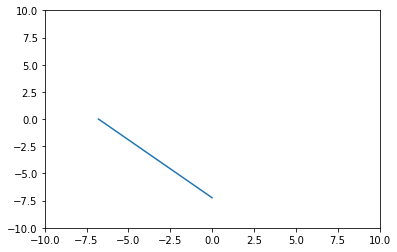

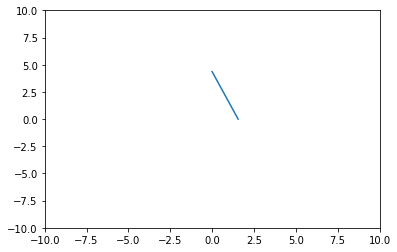

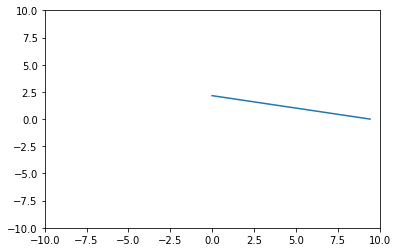

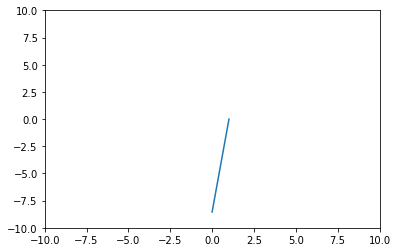

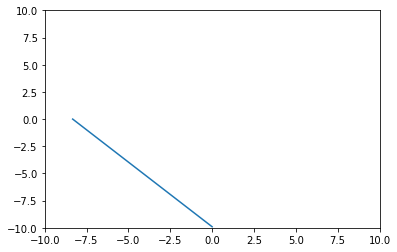

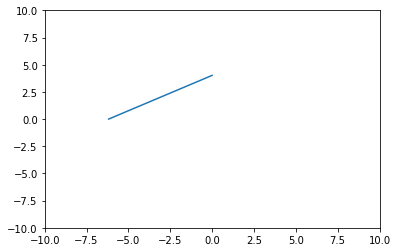

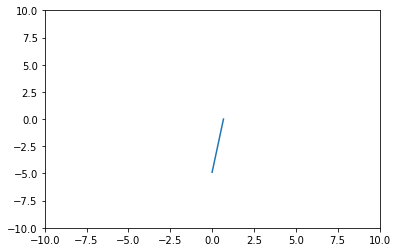

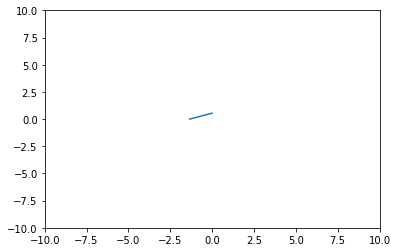

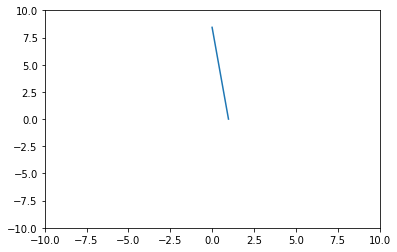

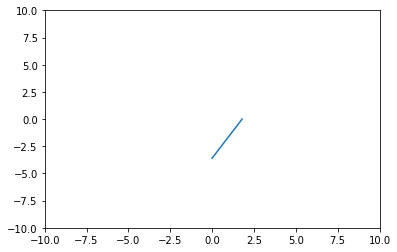

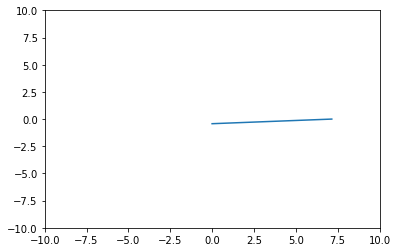

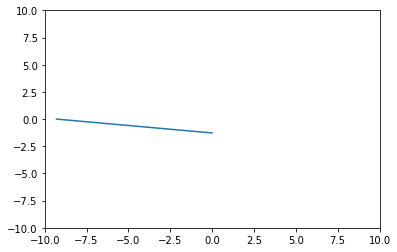

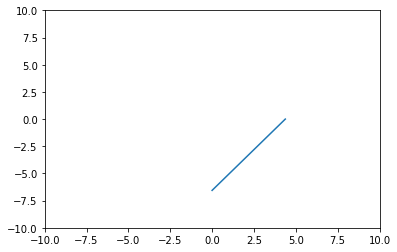

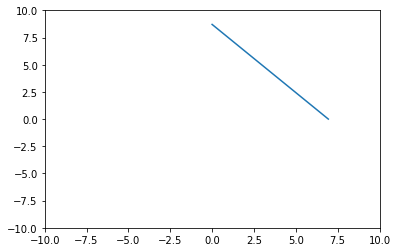

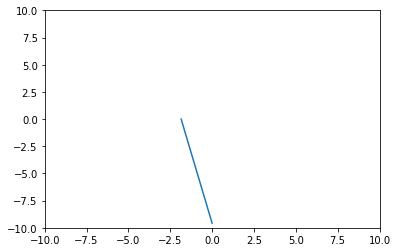

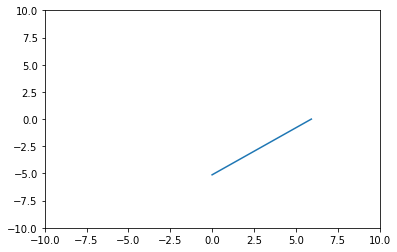

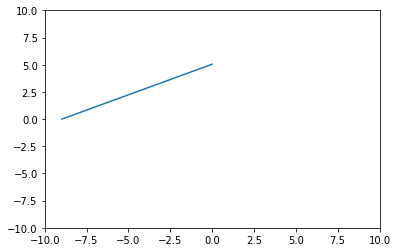

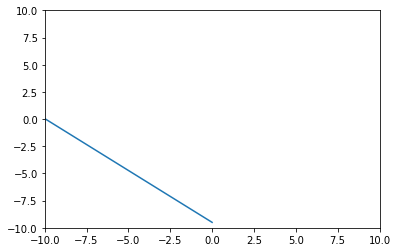

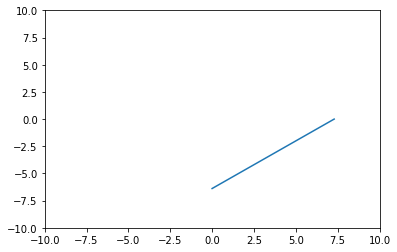

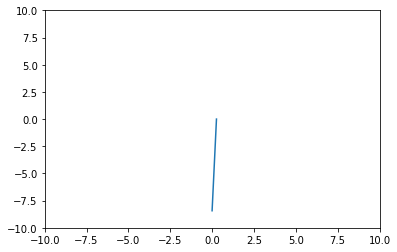

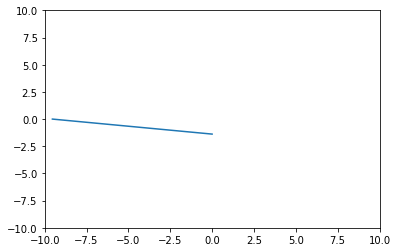

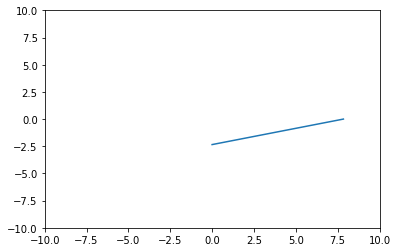

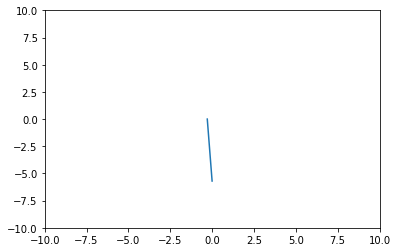

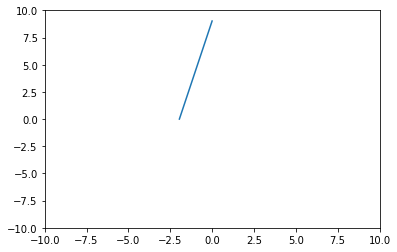

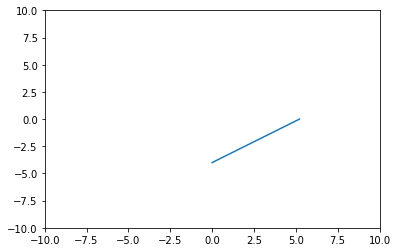

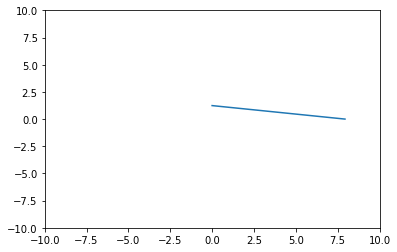

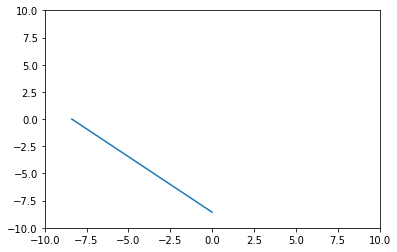

In [10]:

x_bis=50
#f, axarr = plt.subplots(y, x)
for i in range (x_bis):
    plt.plot((0,classifieurs[i,0]),(classifieurs[i,1],0))
    plt.ylim(-10,10)
    plt.xlim(-10,10)
    plt.show()

